# Matrix Plots

Matrixdiagramme ermöglichen es, Daten als farbcodierte Matrizen darzustellen und können auch verwendet werden, um Cluster innerhalb der Daten anzuzeigen.

Beginnen wir mit der Erkundung der Heatmap und Clustermap von Seaborn:

In [15]:
import seaborn as sns
%matplotlib inline

In [16]:
flights = sns.load_dataset('flights')

In [17]:
tips = sns.load_dataset('tips')

In [18]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [19]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

## Heatmap

Damit eine Heatmap richtig funktioniert, sollten die Daten bereits in Matrixform vorliegen, die Funktion sns.heatmap färbt sie im Grunde nur ein. Zum Beispiel:

In [20]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [21]:
# Korrelationsmatrix
tips.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

<AxesSubplot:>

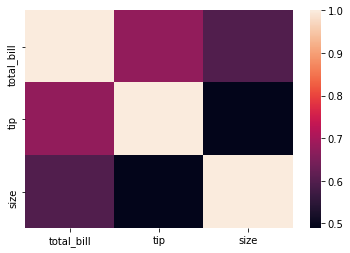

In [22]:
sns.heatmap(tips.corr())

<AxesSubplot:>

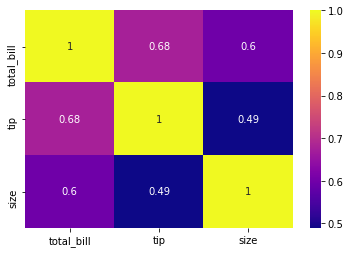

In [25]:
sns.heatmap(tips.corr(),cmap='plasma',annot=True)

Oder mit den Flugzeugdaten:

In [26]:
flights.pivot_table(values='passengers',index='month',columns='year')

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

<AxesSubplot:xlabel='year', ylabel='month'>

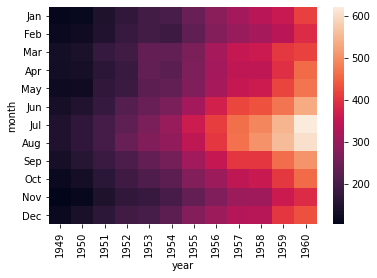

In [27]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

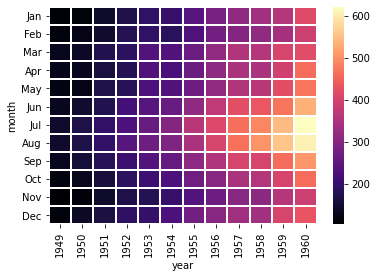

In [28]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

Die Clustermap verwendet hierarchisches Clustering, um eine geclusterte Version der Heatmap zu erstellen. Zum Beispiel:

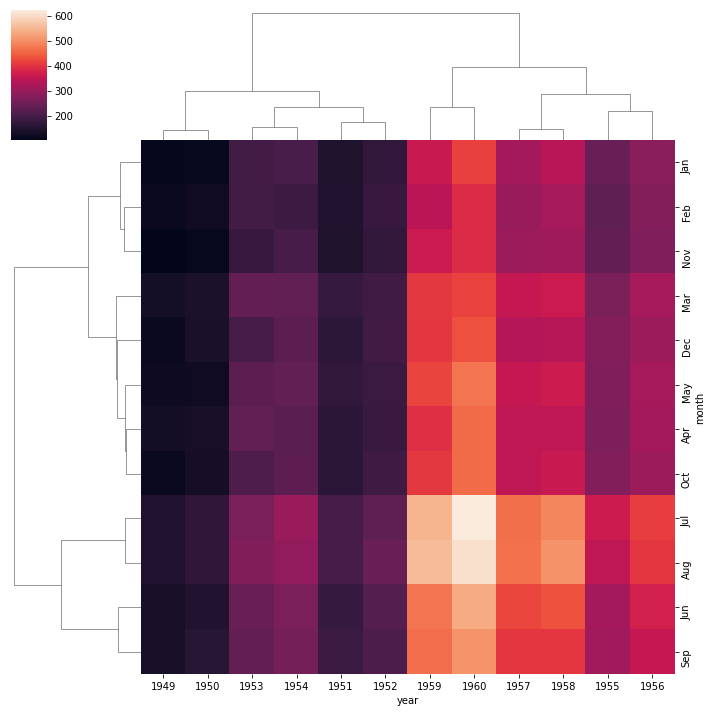

In [29]:
sns.clustermap(pvflights)

Beachte hier, dass die Jahre und Monate nicht mehr geordnet sind, sondern nach Wertgleichheit gruppiert (Passagierzahl). Das bedeutet, dass wir anfangen können, aus dieser Handlung auf Dinge zu schließen, wie z.B. August und Juli sind sich ähnlich (ergibt Sinn, da beide Sommerreisemonate sind).

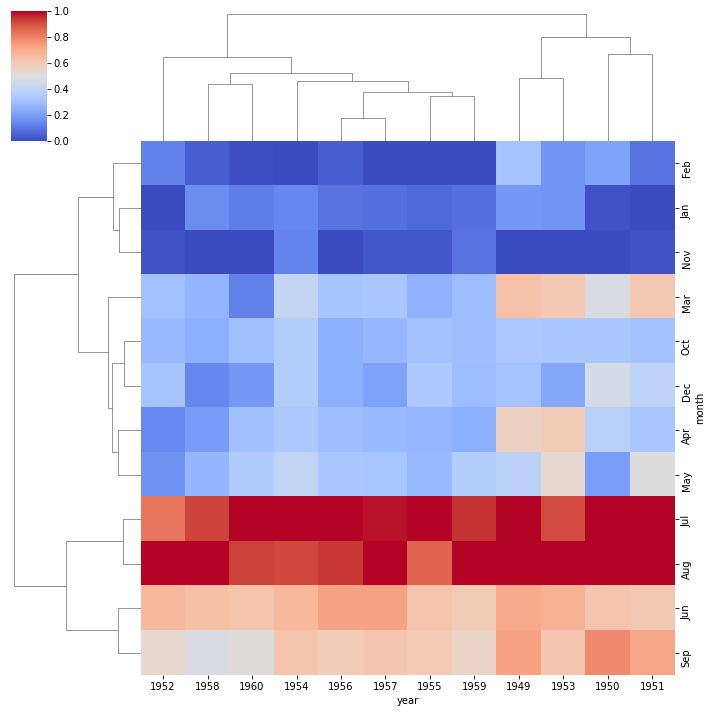

In [30]:
# Wenn man die Daten zusätzlich noch normalisiert, bekommt man die Informationen ein bisschen deutlicher dargestellt.
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)